## 데이터 로드
- 럭키백 이벤트 실습(로지스틱 회귀) 사용한 생선 데이터를 로드합니다: 'https://bit.ly/fish_csv'
- 품종(Species)을 타깃값으로, 나머지 컬럼을 입력값으로 사용합니다.
- 표준 점수로 전처리 합니다.
- 훈련/테스트 셋을 분할하지 않습니다.

In [ ]:
import pandas as pd

fish = pd.read_csv("https://bit.ly/fish_csv")

In [148]:
X = fish.drop(columns=['Species'])
y = fish['Species']

In [149]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = ss.fit_transform(X)

## K-means 군집
- 입력 특성을 이용해 (무게, 길이, 대각선 길이, 높이, 너비) k-means 알고리즘으로 군집을 찾습니다.
- 군집의 개수 k는 2에서 9까지 변경해 가며 엘보우 방법으로 결정합니다. (random_state=42)
- 최적의 k로 군집을 찾은 후 군집 별 데이터 수에 대한 분포를 히스토그램으로 시각화합니다. 

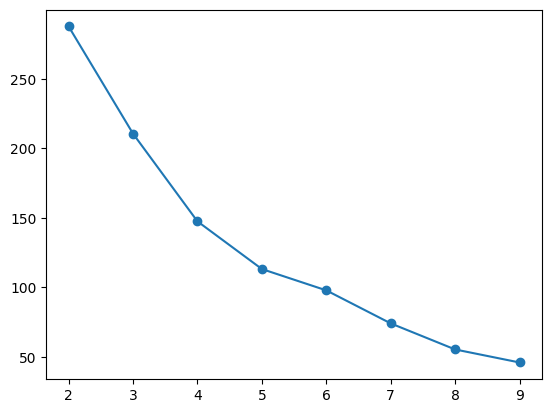

In [150]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.show()

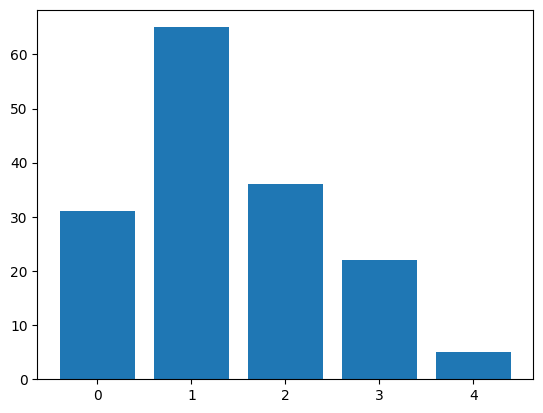

In [151]:
import numpy as np
optimal_k = 5
km = KMeans(n_clusters=optimal_k, random_state=42)
km.fit(X_scaled)
# print(km.labels_)

plt.hist(km.labels_, bins=np.arange(optimal_k + 1) - 0.5, rwidth=0.8)
plt.show()

- PCA를 이용해 입력 데이터를 2개의 차원으로 축소 후, 실제 생선 수인 7로 K 를 지정해 군집을 찾고 시각화합니다. 각 군집을 다른 색으로 나타낼 수 있도록 합니다.

In [152]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)
fish_pca = pca.transform(X_scaled)
print(fish_pca.shape)

(159, 2)


- 군집 결과와 실제 생선 라벨의 관계를 조사하기 위해, 차원 축소 데이터로 타겟 라벨 정보를 시각화합니다. 각 라벨(다른 종류의 생선) 별로 다른 색으로 점이 그려질 수 있도록 합니다.

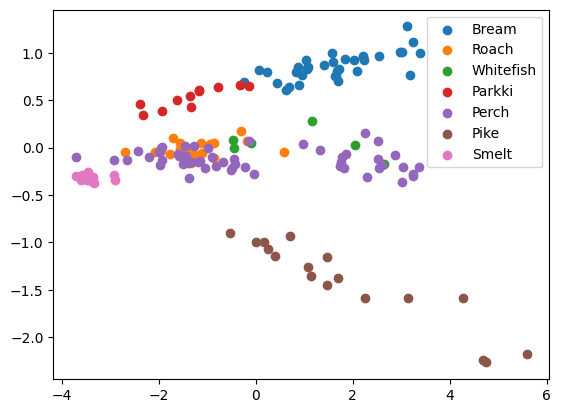

In [185]:
labels = y.unique()
for label in labels:
    data = fish_pca[y == label]
    plt.scatter(data[:, 0], data[:, 1], label=label)
plt.legend()
plt.show()

In [223]:
group_means = fish.groupby('Species').mean()
group_means

,Weight,Length,Diagonal,Height,Width
Species,,,,,
Bream,617.828571,33.108571,38.354286,15.183211,5.427614
Parkki,154.818182,20.345455,22.790909,8.962427,3.220736
Perch,382.239286,27.892857,29.571429,7.861870,4.745723
Pike,718.705882,45.482353,48.717647,7.713771,5.086382
Roach,152.050000,22.275000,24.970000,6.694795,3.657850
Smelt,11.178571,11.921429,13.035714,2.209371,1.340093
Whitefish,531.000000,31.316667,34.316667,10.027167,5.473050


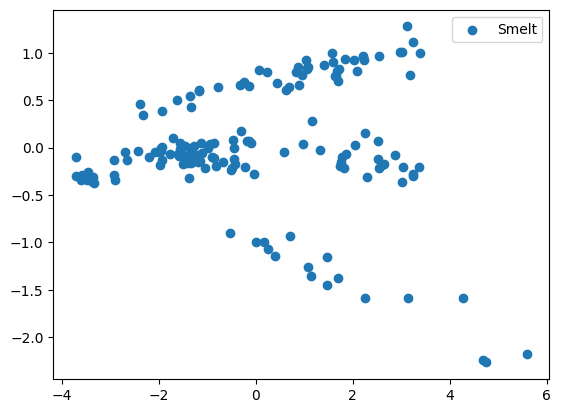

In [229]:
def closest_species(row):
    distances = np.linalg.norm(group_means.values - row.values, axis=1)
    return group_means.index[np.argmin(distances)]

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Closest Species'] = df_scaled.apply(closest_species, axis=1)
df_scaled['Species'] = y.values

pca = PCA(n_components=2)
fish_pca = pca.fit_transform(X_scaled)
df_scaled['PCA1'] = fish_pca[:, 0]
df_scaled['PCA2'] = fish_pca[:, 1]

unique_clusters = df_scaled['Closest Species'].unique()
for cluster in unique_clusters:
    cluster_data = df_scaled[df_scaled['Closest Species'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=cluster)

plt.legend()
plt.show()


## 고찰
위 결과에 대해 고찰합니다.